In [1]:
!pip install --upgrade scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import Xception, VGG16, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [4]:
df.dtypes

Unnamed: 0        int64
ID                int64
AGE               int64
PackHistory     float64
COPDSEVERITY     object
MWT1            float64
MWT2            float64
MWT1Best        float64
FEV1            float64
FEV1PRED        float64
FVC             float64
FVCPRED           int64
CAT               int64
HAD             float64
SGRQ            float64
AGEquartiles      int64
copd              int64
gender            int64
smoking           int64
Diabetes          int64
muscular          int64
hypertension      int64
AtrialFib         int64
IHD               int64
dtype: object

In [5]:
df.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


#COPD
VERY SEVERE - 4<BR>
SEVERE - 3<BR>
MODERATE - 2<BR>
MILD - 1

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

#Data Description
**ID**: Unique identifier for each patient.<br>
**AGE**: Age of the patient.<br>
**PackHistory**: The patient’s history of smoking, measured in pack-years. One pack-year is defined as 20 cigarettes smoked every day for one year.<br>
**COPDSEVERITY**: The severity of the patient’s COPD, which can be mild, moderate, severe, or very severe.<br>
**MWT1, MWT2, MWT1Best**: Measurements related to the 6-minute walk test (MWT), a simple exercise test used to assess aerobic capacity and endurance.<br>
**FEV1**: Forced Expiratory Volume in the first second, a measure of how much air a person can exhale during the first second of a forced breath.<br>
**FEV1PRED**: The predicted FEV1 value for a patient of similar age, sex, and body composition.<br>
**FVC**: Forced Vital Capacity, the total amount of air exhaled during the FEV test.<br>
**FVCPRED**: The predicted FVC for a patient of similar age, sex, and body composition.<br>
**CAT**: COPD Assessment Test, a questionnaire for people with COPD to assess their health status.<br>
**HAD**: Hospital Anxiety and Depression Scale, a questionnaire for detecting states of depression, anxiety and emotional distress.<br>
**SGRQ**: St. George’s Respiratory Questionnaire, a questionnaire for measuring health impairment in patients with COPD.<br>
**AGEquartiles**: Age of the patient divided into quartiles.<br>
**copd**: Whether the patient has COPD (1) or not (0).<br>
**gender**: Gender of the patient.<br>
**smoking**: Whether the patient is a smoker (1) or not (0).<br>
**Diabetes, muscular, hypertension, AtrialFib, IHD**: Whether the patient has these conditions (1) or not (0).

In [7]:
print(df['copd'].value_counts())
print(df['COPDSEVERITY'].value_counts())

2    43
3    27
1    23
4     8
Name: copd, dtype: int64
MODERATE       43
SEVERE         27
MILD           23
VERY SEVERE     8
Name: COPDSEVERITY, dtype: int64


In [8]:
df.shape

(101, 24)

In [9]:
columns = ['Unnamed: 0','ID','COPDSEVERITY','MWT1','MWT2']
df.drop(columns=columns, axis=1,inplace=True)

In [10]:
df.shape

(101, 19)

In [11]:
df.head()

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


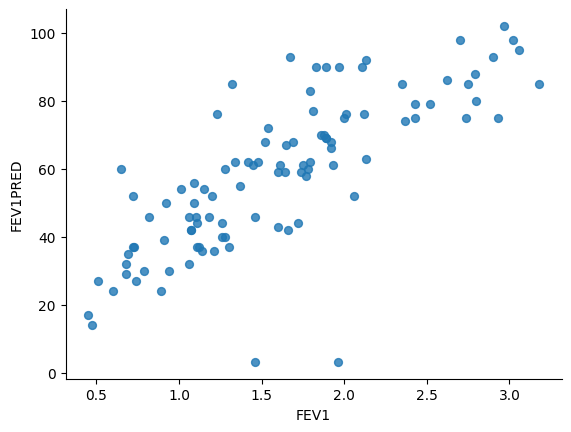

In [12]:
# @title FEV1 vs FEV1PRED

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='FEV1', y='FEV1PRED', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

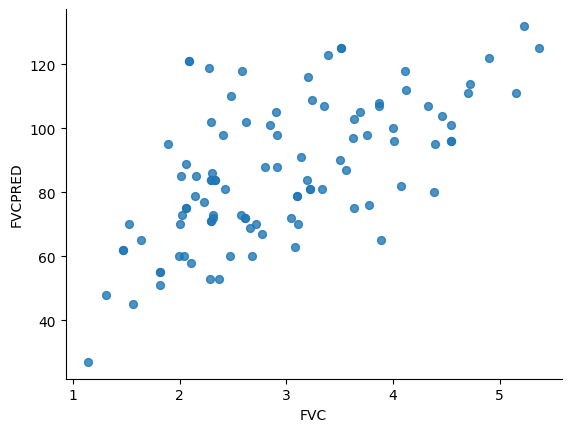

In [13]:
# @title FVC vs FVCPRED

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='FVC', y='FVCPRED', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df.isnull().sum()

AGE             0
PackHistory     0
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [15]:
df[df['MWT1Best'].isna()]

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
100,78,55.0,NaN,1.15,54.0,2.01,85,18,7.0,30.21,4,2,1,2,0,0,0,0,0


In [16]:
df.fillna(df.mean(),inplace=True)

In [17]:
df.isnull().sum()

AGE             0
PackHistory     0
MWT1Best        0
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.describe()

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,70.09901,39.698020,399.110000,1.603762,58.531485,2.954950,86.435644,19.336634,11.180198,40.185842,2.475248,2.19802,0.643564,1.841584,0.207921,0.188119,0.118812,0.198020,0.089109
std,7.89874,24.558713,106.016027,0.672763,22.294821,0.976283,21.740016,18.674730,8.588807,18.239268,1.109901,0.88340,0.481335,0.366952,0.407844,0.392756,0.325181,0.400495,0.286322
min,44.00000,1.000000,120.000000,0.450000,3.290000,1.140000,27.000000,3.000000,0.000000,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.00000,20.000000,305.000000,1.100000,42.000000,2.270000,71.000000,12.000000,6.000000,28.410000,1.000000,2.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.00000,36.000000,420.000000,1.600000,60.000000,2.770000,84.000000,18.000000,10.000000,38.210000,3.000000,2.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.00000,54.000000,465.000000,1.960000,75.000000,3.630000,103.000000,24.000000,15.000000,55.230000,3.000000,3.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.00000,109.000000,699.000000,3.180000,102.000000,5.370000,132.000000,188.000000,56.200000,77.440000,4.000000,4.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

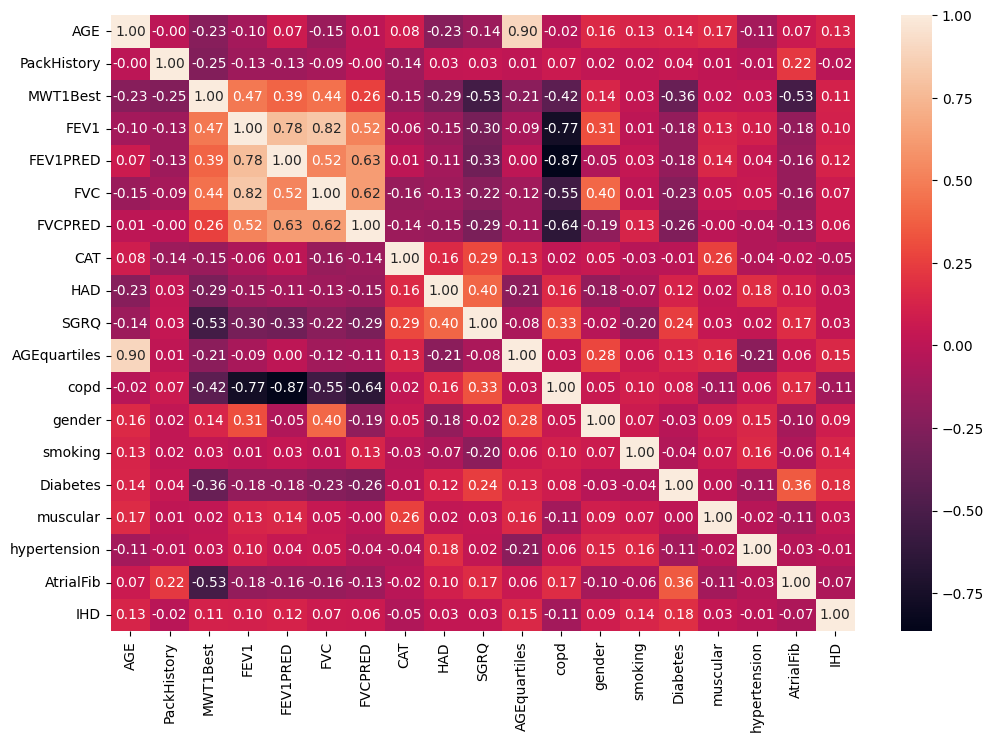

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='rocket',fmt='.2f')

**AGE and AGEquartiles** are highly correlated.<br>
**PackHistory and Smoking** are highly correlated.<br>
**FEV1 and FEV1PRED** are highly correlated.<br>
**FVC and FVCPRED** are highly correlated.

In [21]:
age = pd.DataFrame(df['AGE'].value_counts(bins=3)).reset_index()
age.columns = ['Range','Age']
age['Range'].astype(str)
for i,col in enumerate(age):
  for row in range(age.shape[0]):
    age[col][row] = age[col].astype('str')[row][1:-1]
  break
age['Range'][2]  = '43.9551, 58.667'

In [22]:
age

,Range,Age
0,"58.667, 73.333",58
1,"73.333, 88.0",35
2,"43.9551, 58.667",8


<ipython-input-23-764716d235f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = age , x='Range',y='Age',palette = 'viridis')


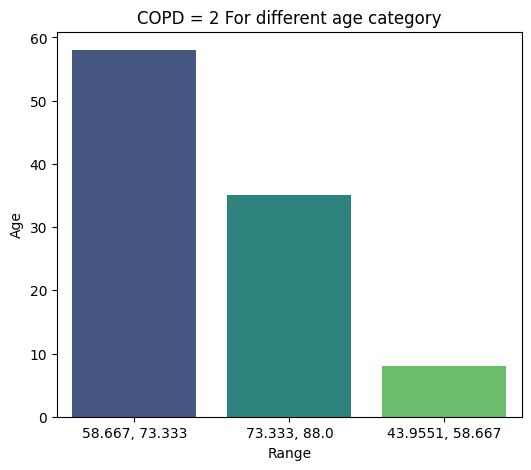

In [23]:
plt.figure(figsize=(6,5))
sns.barplot(data = age , x='Range',y='Age',palette = 'viridis')
plt.title('COPD = 2 For different age category')
plt.xticks(rotation=0)
plt.show()

In [24]:
df['copd'].value_counts()

2    43
3    27
1    23
4     8
Name: copd, dtype: int64

In [25]:
df.head()

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


In [26]:
df.gender.value_counts()

1    65
0    36
Name: gender, dtype: int64

In [27]:
df_copd = df[['gender','copd']]
gender_fem = {}
for x in df_copd[df_copd['gender']==0]['copd']:
  if(x in gender_fem):
    gender_fem[x]+=1
  else:
    gender_fem[x] =1
females_COPD  = df_copd.groupby(['gender','copd']).size().unstack()
females_COPD.reset_index(inplace=True)

<ipython-input-28-dbdc22f43b72>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=res,x='gender',y='Count',hue='copd',palette=custom_palette)


<Axes: xlabel='gender', ylabel='Count'>

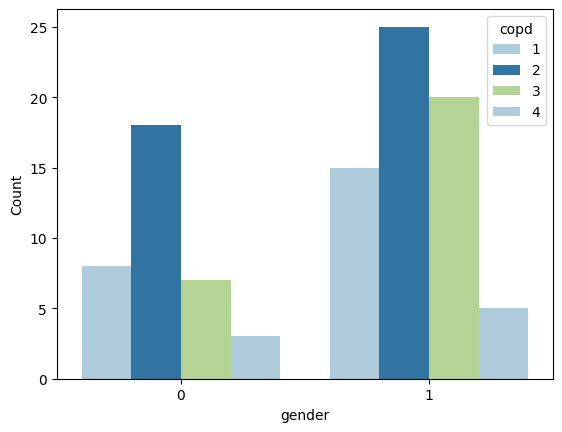

In [28]:
res = females_COPD.melt(id_vars='gender',var_name='copd',value_name='Count')
custom_palette = sns.color_palette("Paired", 3)
sns.barplot(data=res,x='gender',y='Count',hue='copd',palette=custom_palette)

In [29]:
X = df.drop('copd', axis=1)
y = df['copd']

In [30]:
y.value_counts()

2    43
3    27
1    23
4     8
Name: copd, dtype: int64

In [31]:
# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [32]:
len(X_train), len(X_test), len(X_val)

(72, 21, 8)

In [33]:
X_train.shape, X_val.shape, X_test.shape

((72, 18), (8, 18), (21, 18))

In [34]:
y_train.shape, y_val.shape, y_test.shape

((72,), (8,), (21,))

In [35]:
y_train = np.expand_dims(y_train, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)

In [36]:
y_train.shape, y_val.shape, y_test.shape

((72, 1), (8, 1), (21, 1))

In [37]:
# Convert ECG signals to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

In [38]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [40]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

In [41]:
y_train_encoded = np.delete(y_train_encoded, 0, axis=1)

# Train the model
history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
3/3 [==============================] - 1s 149ms/step - loss: 1.4626 - accuracy: 0.2500 - val_loss: 1.4269 - val_accuracy: 0.2500
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 1.3331 - accuracy: 0.3611 - val_loss: 1.4509 - val_accuracy: 0.3750
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.2217 - accuracy: 0.5139 - val_loss: 1.4843 - val_accuracy: 0.3750
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 1.1701 - accuracy: 0.5556 - val_loss: 1.5252 - val_accuracy: 0.3750
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 1.0798 - accuracy: 0.5694 - val_loss: 1.5728 - val_accuracy: 0.3750
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 1.0212 - accuracy: 0.5972 - val_loss: 1.6340 - val_accuracy: 0.3750


Text(0.5, 1.0, 'Training and Validation Accuracy')

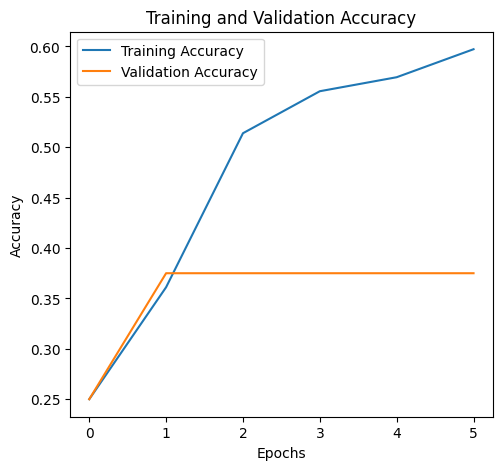

In [42]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

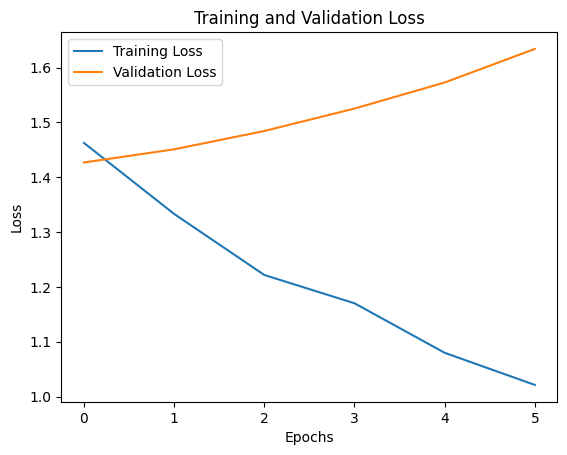

In [43]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score for each class
precision = []
recall = []
f1_score = []
for i in range(4):
    true_positives = conf_matrix[i, i]
    false_positives = sum(conf_matrix[i, :]) - true_positives
    false_negatives = sum(conf_matrix[:, i]) - true_positives
    precision.append(true_positives / (true_positives + false_positives))
    recall.append(true_positives / (true_positives + false_negatives))
    f1_score.append(2 * precision[-1] * recall[-1] / (precision[-1] + recall[-1]))

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

1/1 [==============================] - 0s 101ms/step
Precision: [nan, 0.8, 0.0, 0.0]
Recall: [0.0, 0.21052631578947367, 0.0, nan]
F1-Score: [nan, 0.3333333333333333, nan, nan]


<ipython-input-44-6928a798e6cb>:14: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(true_positives / (true_positives + false_positives))
<ipython-input-44-6928a798e6cb>:16: RuntimeWarning: invalid value encountered in scalar divide
  f1_score.append(2 * precision[-1] * recall[-1] / (precision[-1] + recall[-1]))
<ipython-input-44-6928a798e6cb>:15: RuntimeWarning: invalid value encountered in scalar divide
  recall.append(true_positives / (true_positives + false_negatives))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


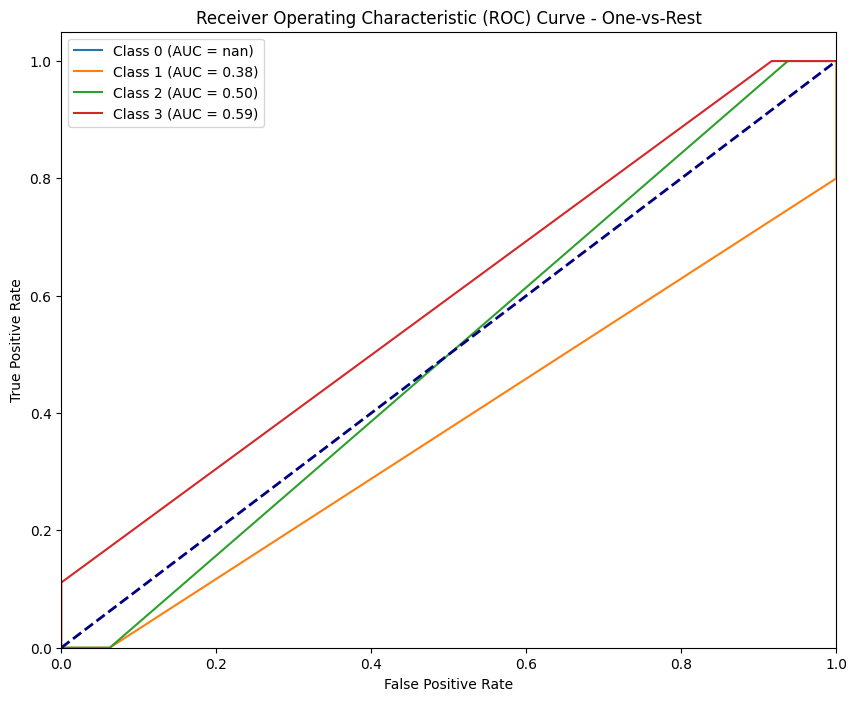

In [47]:
from sklearn.metrics import roc_curve, auc

# ROC curves and AUC scores for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    # One-hot encode the ground truth labels for the current class
    y_test_i = to_categorical(y_test)[:, i]

    # Calculate ROC curve and AUC
    fpr[i], tpr[i], _ = roc_curve(y_test_i, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend()
plt.show()